In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the Iris Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)


In [5]:
# Display dataset information
print(f"Dataset shape: {X.shape}")
print(X.head())

Dataset shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [20]:
# Dropping the species column (target variable)
# Note: The species column is not included in the `data.data` by default.

# 1. KMeans Clustering
## Description of KMeans:
# KMeans is a partition-based clustering algorithm that assigns data points to 'k' clusters based on minimizing intra-cluster variance.

# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

C:\Users\ak898\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# Adding cluster labels to the dataset
X["KMeans_Cluster"] = kmeans_labels


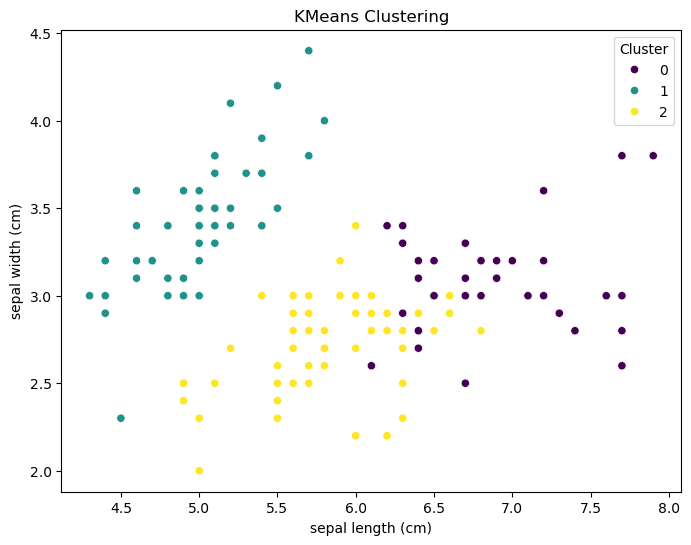

In [24]:
# Visualizing KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("KMeans Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()


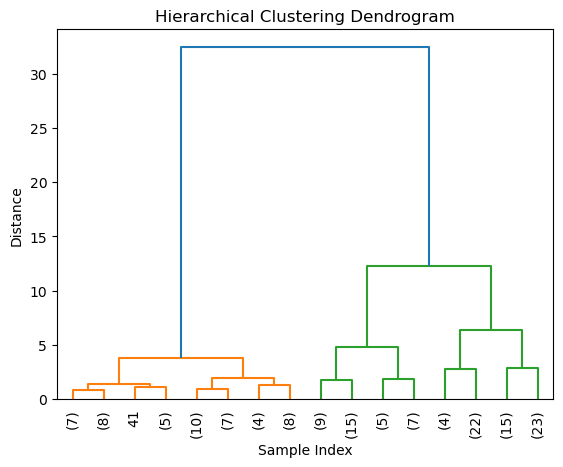

In [26]:
# 2. Hierarchical Clustering
## Description of Hierarchical Clustering:
# Hierarchical clustering builds a tree-like structure of data points, grouping them based on similarity. It can be agglomerative (bottom-up) or divisive (top-down).

# Applying Hierarchical Clustering
linkage_matrix = linkage(X.iloc[:, :-1], method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [28]:
# Assigning Clusters using Hierarchical Clustering
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
X["Hierarchical_Cluster"] = hierarchical_labels

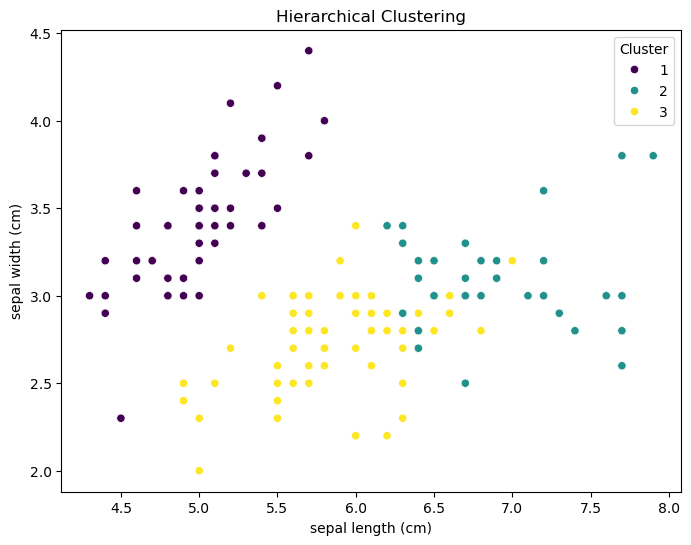

In [30]:
# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=hierarchical_labels, palette="viridis")
plt.title("Hierarchical Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()


In [32]:
# Conclusion
print("KMeans Clusters Distribution:")
print(X["KMeans_Cluster"].value_counts())
print("\nHierarchical Clusters Distribution:")
print(X["Hierarchical_Cluster"].value_counts())

KMeans Clusters Distribution:
KMeans_Cluster
2    61
1    50
0    39
Name: count, dtype: int64

Hierarchical Clusters Distribution:
Hierarchical_Cluster
3    64
1    50
2    36
Name: count, dtype: int64
